# Species Classification - SVM Model

## About Dataset

The Iris flower dataset is one of the most popular ones for machine learning. More information can be found [here](https://en.wikipedia.org/wiki/Iris_flower_data_set).

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

## Load Iris Dataset

In [2]:
iris_data = datasets.load_iris()

In [3]:
# Assign petal length and petal width to variable X
X = iris_data["data"][:, (2,3)] # petal length, petal width

In [4]:
# Variable y contains only iris virginica
y = (iris_data["target"] == 2).astype(np.float64)

## Build Pipeline with StandardScaler and LinearSVC

In [5]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

### Use the Model to Make Predictions

In [6]:
svm_clf.predict([[3.5, 2.5]])

array([1.])

Unlike the logistic regressin the SVM classifiers do not return probabilities.

## Plot Classification Using Large and Small Hyperparameter C

In [7]:
# Build a models for hyperparameters C=1 and C=100
scaler = StandardScaler()
svm_clf_1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf_2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf_1 = Pipeline([
    ("scaler", scaler),
    ("linear_svc", svm_clf_1)
])
scaled_svm_clf_2 = Pipeline([
    ("scaler", scaler),
    ("linear_svc", svm_clf_2)
])

scaled_svm_clf_1.fit(X, y)
scaled_svm_clf_2.fit(X, y)

C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [8]:
# Convert to unscaled parameters
b1 = svm_clf_1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf_2.decision_function([-scaler.mean_ / scaler.scale_])

w1 = svm_clf_1.coef_[0] / scaler.scale_
w2 = svm_clf_2.coef_[0] / scaler.scale_

svm_clf_1.intercept_ = np.array([b1])
svm_clf_2.intercept_ = np.array([b2])

svm_clf_1.coef_ = np.array([w1])
svm_clf_2.coef_ = np.array([w2])

In [9]:
# Find support vectors
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()

svm_clf_1.support_vectors_ = X[support_vectors_idx1]
svm_clf_2.support_vectors_ = X[support_vectors_idx2]

(4.0, 5.9, 0.8, 2.8)

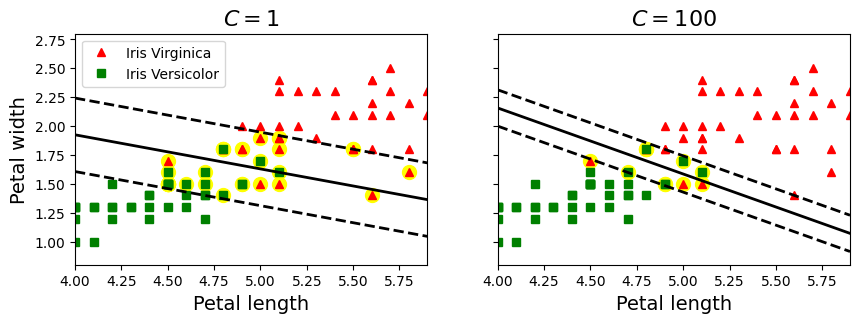

In [10]:
# Plot classifiers
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # At the decision bourdary, w0*x0 + w1*x1 + b = 0 => x1 = -w0/w1*x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1 / w[1]
    up = decision_boundary + margin
    down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=100, facecolors="yellow")
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, up, "k--", linewidth=2)
    plt.plot(x0, down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,3), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", label="Iris Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "gs", label="Iris Versicolor")
plot_svc_decision_boundary(svm_clf_1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.title("$C = {}$".format(svm_clf_1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "gs")
plot_svc_decision_boundary(svm_clf_2, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf_2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

The model with hyperparameter C=1 has a lot of margin violations but it will generalize better.

## Compare Linear SVC, SVC, and SGDClassifier

From iris dataset use Iris Setosa and Iris Versicolor classes that are linearly separable to get `LinearSVC`, `SVC`, and `SGDClassifier` to produce similar models.

In [11]:
# Select Iris Setosa and Iris Versicolor
y = iris_data["target"]

setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [12]:
# Train all three classifiers
C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha, max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC: ", lin_clf.intercept_, lin_clf.coef_)
print("SVC: ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier: ", sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:  [0.28475098] [[1.05364854 1.09903804]]
SVC:  [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier:  [0.117] [[0.77714169 0.72981762]]


Plot decision boundaries for all three models

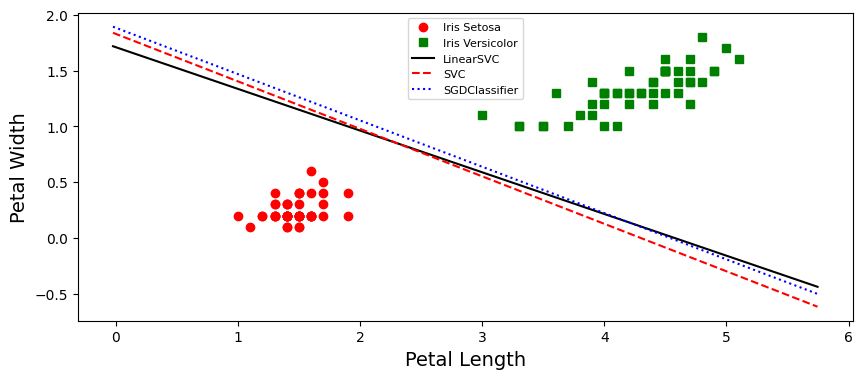

In [13]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0] / lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0] / lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0] / svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0] / svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0] / sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0] / sgd_clf.coef_[0, 1]

# Transform decision boundary lines to the original scale
line1 = scaler.inverse_transform([[-2, -2 * w1 + b1], [2, 2 * w1 + b1]])
line2 = scaler.inverse_transform([[-2, -2 * w2 + b2], [2, 2 * w2 + b2]])
line3 = scaler.inverse_transform([[-2, -2 * w3 + b3], [2, 2 * w3 + b3]])

# Plot all decision boundaries
plt.figure(figsize=(10, 4))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Iris Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs", label="Iris Versicolor")
plt.plot(line1[:, 0], line1[:, 1], "k-", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "r--", label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "b:", label="SGDClassifier")
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="upper center", fontsize=8)
plt.show()